Version 2024.01.07 - A. Lundervold

[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MMIV-ML/ELMED219/blob/main/Lab0-ML/Lab0-03-patient-similarity-networks.ipynb)

# Iris flower classification with pytorch   

Motivated from the [pytorch tutorial](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html) and [this](https://janakiev.com/blog/pytorch-iris) blog post.



### Introduction (Iris flower data set & Multiclass classification)

In this introductory notebook on ML and DL we will have a look on how to use [PyTorch](https://pytorch.org) with the [Iris flower data](https://en.wikipedia.org/wiki/Iris_flower_data_set) set. We will create and train a neural network with [Linear layers](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) and we will employ a [Softmax](https://en.wikipedia.org/wiki/Softmax_function) function in the final layer of a neural network-based classifier, and the [Adam](https://arxiv.org/abs/1412.6980) optimizer.

### Check your platform

In [1]:
import platform
import os
from os.path import expanduser
home = expanduser("~")

if platform.system() == 'Darwin':
    print(f'OK, you are running on MacOS ({platform.version()})')
    OVERLEAF_dir = f'{home}/Dropbox/Apps/Overleaf/My_project'
    TREE = '/usr/local/bin/tree -L 1'          # MacOS (brew install tree)
    MacOS = True
    Linux = False
if platform.system() == 'Linux':
    print(f'OK, you are running on Linux ({platform.version()})')
    OVERLEAF_dir = f'{home}/Dropbox/Apps/Overleaf/My_project'
    TREE = '/usr/bin/tree -L 4'
    Linux = True
    MacOS = False
if platform.system() == 'Windows':
    print(f'OK, but consider to install WSL for Windows10 since you are running on {platform.system()}')
    print('Check https://docs.microsoft.com/en-us/windows/wsl/install-win10')
    MacOS = False
    Linux = False

OK, you are running on MacOS (Darwin Kernel Version 23.2.0: Wed Nov 15 21:54:10 PST 2023; root:xnu-10002.61.3~2/RELEASE_X86_64)


### Check if on Colab

In [2]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory
# as that makes some difference for the code below.
# We'll do this in every notebook of the course.

try:
    import google.colab
    # If this statement executes without error, you're in a Colab environment.
    is_colab = True
    print("Running in Google Colab.")
except ImportError:
    # An ImportError means you're not in a Colab environment.
    is_colab = False
    print("Not running in Google Colab.")

Not running in Google Colab.


### Import libraries

In [140]:
# Libraries for linear algebra, numerics,  and data processing
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# System
import os
import sys

# Scikit-learn for traditional machine leartning
import sklearn
from sklearn.datasets import load_iris
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder

# Pytorch deep learning library
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

# Progress bar  
import tqdm

plt.style.use('ggplot')

This cell is importing various Python libraries that are commonly used for data analysis, visualization, system operations, machine learning, and deep learning:

1. **`numpy` and `pandas`**: These are fundamental packages for scientific computing and data manipulation in Python.

2. **`matplotlib.pyplot` and `seaborn`**: These are libraries for creating static, animated, and interactive visualizations in Python.

3. **`os` and `sys`**: These are modules that provide functions to interact with the operating system and the Python interpreter.

4. **`sklearn`**: This is a library for machine learning in Python. It includes functions for loading datasets (`load_iris`), splitting datasets into training and test sets (`train_test_split`), preprocessing data (`StandardScaler` and `OneHotEncoder`), and evaluating models (`roc_curve` and `auc`).

5. **`torch`, `torch.nn.functional`, `torch.nn`, and `torch.autograd.Variable`**: These are parts of PyTorch, a library for deep learning in Python. `torch.nn` and `torch.nn.functional` provide classes and functions for building neural networks, `torch.autograd.Variable` is a class for automatic differentiation.

6. **`tqdm`**: This is a library for creating progress bars.

Finally, `plt.style.use('ggplot')` is used to set the style of the plots to 'ggplot', which is a popular plotting style in R.

### Data preparation

In [141]:
# Load the Iris dataset
iris = load_iris()
X = iris['data']   # or X = iris.data
y = iris['target'] # or y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names

print(f'X.shape = {X.shape}, y.shape = {y.shape}')
print(f'X[:5] = \n{X[:5]}')
print(f'y[:5] = \n{y[:5]}')
print(f'target_names = {target_names}')
print(f'feature_names = {feature_names}')


X.shape = (150, 4), y.shape = (150,)
X[:5] = 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y[:5] = 
[0 0 0 0 0]
target_names = ['setosa' 'versicolor' 'virginica']
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


This cell is loading the Iris dataset and printing some basic information about it. Here's a breakdown of what each line does:

1. **`iris = load_iris()`**: This line loads the Iris dataset from the `sklearn.datasets` module. The Iris dataset is a classic dataset in machine learning and statistics. It contains measurements for 150 iris flowers from three different species.

2. **`X = iris['data']` and `y = iris['target']`**: These lines extract the feature matrix `X` and the target vector `y` from the dataset. `X` contains the features, which are the measurements of the flowers, and `y` contains the targets, which are the species of the flowers.

3. **`target_names = iris.target_names` and `feature_names = iris.feature_names`**: These lines extract the names of the targets and the features from the dataset.

4. **`print(f'X.shape = {X.shape}, y.shape = {y.shape}')`**: This line prints the shapes of `X` and `y`. This is useful for checking that the data has been loaded correctly.

5. **`print(f'X[:5] = \n{X[:5]}')` and `print(f'y[:5] = \n{y[:5]}')`**: These lines print the first five rows of `X` and `y`. This is useful for getting a sense of what the data looks like.

6. **`print(f'target_names = {target_names}')` and `print(f'feature_names = {feature_names}')`**: These lines print the names of the targets and the features. This is useful for understanding what the targets and features represent.

### Scale the data
We will scale the data (features) to have mean 0 and variance 1

Data scaling is a crucial step in preprocessing when working with machine learning algorithms, especially neural networks. Here are the main reasons why we scale the data to have zero mean and unit variance:

1. **Consistent Range**: Features in your dataset may exist in different ranges. For example, the age of individuals might range from 0 to 100, while income might range from 0 to 100,000. These differing scales can cause issues with certain algorithms that use distance measures, like K-nearest neighbors (KNN) or support vector machines (SVM), or algorithms that use gradient descent to optimize the parameters, like neural networks. Scaling solves this problem by transforming all features to the same scale.

2. **Faster Convergence**: In machine learning, we often use optimization methods such as gradient descent to update the model and reduce errors. If features are on different scales, some weights will update faster than others since feature values X play a role in the weight updates, hence optimization can be uneven. If we scale all features to the same scale, this can help the optimization algorithm converge more quickly and efficiently.

3. **Better Performance**: Some algorithms assume that all features are centered around zero and have approximately the same variance. If a feature's variance is orders of magnitude more than the variance of other features, that particular feature might dominate other features in the dataset, which is not something we want happening.

4. **Preventing Vanishing and Exploding Gradients**: In deep learning, if data is not scaled, the gradients may either vanish (become too small) or explode (become too large), causing the model to take longer to converge, or fail to converge at all.

The method of scaling to zero mean and unit variance is called **Standardization** or **[Z-score](https://en.wikipedia.org/wiki/Standard_score) normalization**.

In [142]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

This cell is performing feature scaling on the input data `X` using the `StandardScaler` class from the `sklearn.preprocessing` module.

Here's a breakdown of what each line does:

1. **`scaler = StandardScaler()`**: This line creates an instance of the `StandardScaler` class. `StandardScaler` standardizes features by removing the mean and scaling to unit variance. The standard score of a sample `x` is calculated as `z = (x - u) / s`, where `u` is the mean of the training samples, and `s` is the standard deviation of the training samples.

2. **`X_scaled = scaler.fit_transform(X)`**: This line fits the scaler to the data `X` and then transforms `X`. In other words, it calculates the mean and standard deviation of `X` (fit), and then standardizes `X` by subtracting the mean and dividing by the standard deviation (transform). The transformed data `X_scaled` has zero mean and unit variance.

After this cell is run, `X_scaled` can be used as the input for a machine learning model. The model will likely perform better on `X_scaled` than on the original data `X`, especially if `X` contains features of different scales.

### Split the data set into training and test sets

80% of the data will be used for training and 20% for testing

In [143]:
# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

This cell is splitting the scaled Iris dataset into a training set and a test set using the `train_test_split` function from the `sklearn.model_selection` module.

Here's a breakdown of what each part of the code does:

- `X_scaled, y`: These are the first two arguments to `train_test_split` and represent the feature matrix and the target vector of the dataset, respectively. `X_scaled` is the scaled version of the original feature matrix `X`.

- `test_size=0.2`: This argument specifies that 20% of the data should be used for the test set. The remaining 80% will be used for the training set.

- `random_state=42`: This argument sets the seed for the random number generator that is used for shuffling the data before splitting. Setting the seed to a fixed number (42 in this case) ensures that the output of the function is deterministic, i.e., running the function multiple times with the same input will always produce the same output.

The output of `train_test_split` is a list of four arrays: the training data (`X_train`), the test data (`X_test`), the training labels (`y_train`), and the test labels (`y_test`). These will be used for training and evaluating a machine learning model.

### Visualize the data as part of the exploratory data analysis (EDA)

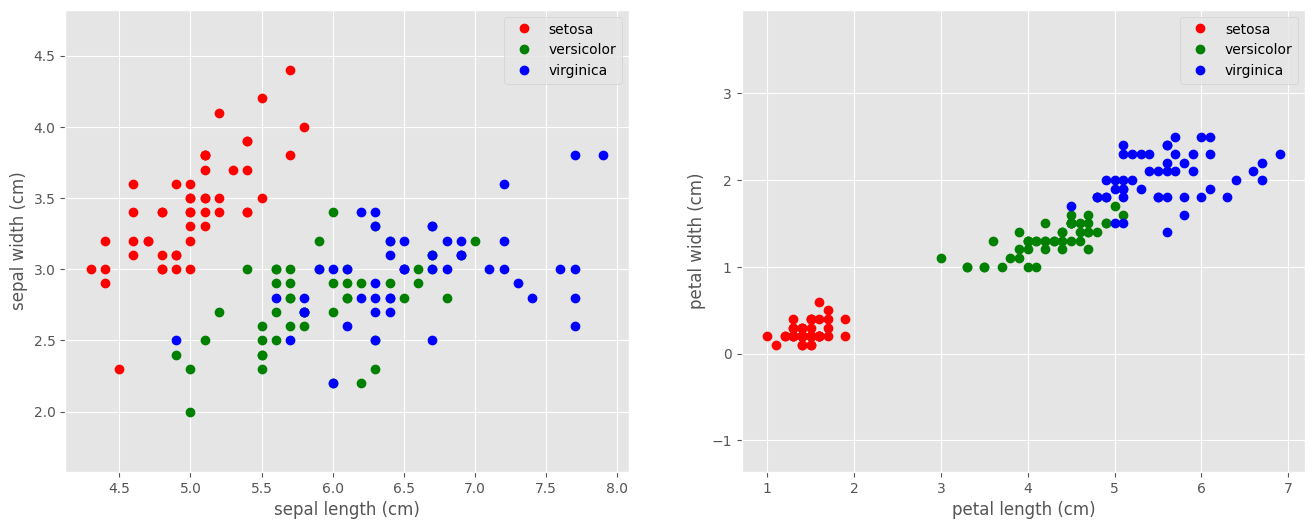

In [144]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

for target, target_name in enumerate(target_names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1], 
             linestyle='none', 
             marker='o', 
             color=colors[target_name],
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(target_names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3], 
             linestyle='none', 
             marker='o', 
             color=colors[target_name],
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();

This cell is creating two scatter plots of the Iris dataset, with different colors for each species. Here's a breakdown of what each part of the code does:

1. **`fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))`**: This line creates a figure with two subplots, `ax1` and `ax2`. The figure size is set to 16x6.

2. **`colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}`**: This line creates a dictionary that maps the species names to colors.

3. The two for-loops plot the data for each species on the two subplots. For each species, the data is extracted (`X_plot = X[y == target]`), and then plotted on the subplot (`ax1.plot` or `ax2.plot`). The color of the markers is set to the color corresponding to the species (`color=colors[target_name]`), and the species name is used as the label for the markers (`label=target_name`).

4. The first subplot (`ax1`) plots the first feature against the second feature (`X_plot[:, 0]` against `X_plot[:, 1]`), and the second subplot (`ax2`) plots the third feature against the fourth feature (`X_plot[:, 2]` against `X_plot[:, 3]`).

5. The `set_xlabel` and `set_ylabel` methods are used to set the labels of the x-axis and y-axis, respectively.

6. The `axis('equal')` method is used to set an equal scaling on both axes, which means that a unit on the x-axis is the same length as a unit on the y-axis.

7. Finally, the `legend` method is used to add a legend to each subplot. The legend will contain an entry for each species, with a marker in the color corresponding to the species and a label with the species name.

### YOUR TURN:

_How do you interprete these plots?_

The resulting plots are scatter plots of the Iris dataset, where each point represents an iris flower. The plots are color-coded according to the species of the iris, with setosa in red, versicolor in green, and virginica in blue.

The first plot (on the left) shows the relationship between the first feature (on the x-axis) and the second feature (on the y-axis). The second plot (on the right) shows the relationship between the third feature (on the x-axis) and the fourth feature (on the y-axis). The features are measurements of the iris flowers, such as sepal length, sepal width, petal length, and petal width.

By looking at these plots, you can get a sense of how the species are distributed with respect to the features and how the features relate to each other. For example, if the points of different colors form distinct clusters, this indicates that the species can be well-separated based on these features. If the points of different colors overlap significantly, this indicates that the species cannot be easily distinguished based on these features alone.

In addition, if the points form a linear pattern, this indicates a linear relationship between the two features. If the points form a non-linear pattern, this indicates a non-linear relationship between the features.

Finally, the plots can also help identify any outliers or unusual data points that might need to be investigated further.

## Configure Neural Network Models

We will now create a neural network model with a specified number of hidden layers and hidden units. In short:

- We will create a sequential neural network model. A sequential model is a neural network where the output of one layer is the input to the next layer.

- The first linear layer is called `input` and has `n_hidden` units. The input to the linear layer has `n_features` dimensions, and the output has `n_hidden` dimensions. The linear layer is initialized with random weights and biases.

- We will use a ReLU activation function to the model. The ReLU activation function (`relu`) is applied to the output of the linear layer.

- The final linear layer is called `output` and has `n_classes` units. The input to the linear layer has `n_hidden` dimensions, and the output has `n_classes` dimensions. This linear layer is initialized with random weights and biases.

- We add a softmax activation function to the model. The softmax activation function is called `softmax`. The softmax activation function is applied to the output of the linear layer.

- Finally, x returns the model

Summary: The model consists of two linear layers with ReLU activation functions and a softmax activation function. The first linear layer has `n_hidden` units and the second linear layer has `n_classes` units. The softmax activation function is applied to the output of the second linear layer. The softmax activation function is used to convert the output of the second linear layer to a probability distribution over the classes.


### How to visualize the model (conseptually)?

A very simple approach is to use the `matplotlib`, e.g.: 

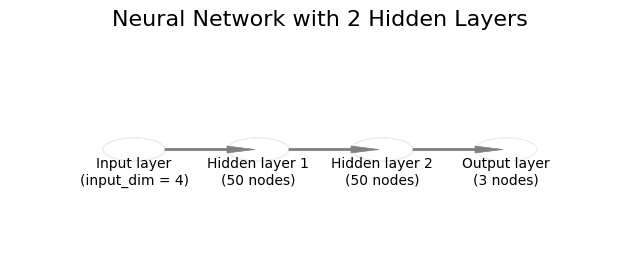

In [145]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow

def draw_layer(ax, position, n_nodes, layer_name):
    # Draw nodes
    for i in range(n_nodes):
        circle = plt.Circle(position, 0.05, fill=False)
        ax.add_artist(circle)
        
    # Add layer name
    ax.text(position[0], position[1] - 0.15, layer_name, ha='center')

def draw_arrow(ax, start, end):
    # Draw arrow
    arrow = FancyArrow(start[0], start[1], end[0] - start[0], end[1] - start[1], width=0.01, color='gray')
    ax.add_artist(arrow)

fig, ax = plt.subplots(figsize=(8, 3))

# Draw layers
draw_layer(ax, (0.2, 0.5), 10, 'Input layer\n(input_dim = 4)')
draw_layer(ax, (0.4, 0.5), 10, 'Hidden layer 1\n(50 nodes)')
draw_layer(ax, (0.6, 0.5), 10, 'Hidden layer 2\n(50 nodes)')
draw_layer(ax, (0.8, 0.5), 3, 'Output layer\n(3 nodes)')

# Draw arrows
draw_arrow(ax, (0.25, 0.5), (0.35, 0.5))
draw_arrow(ax, (0.45, 0.5), (0.55, 0.5))
draw_arrow(ax, (0.65, 0.5), (0.75, 0.5))

# Set limits and hide axes
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

ax.set_title('Neural Network with 2 Hidden Layers', fontsize=16)

plt.show()

This cell is creating a simple visualization of a neural network architecture using matplotlib. Here's a breakdown of what each part of the code does:

1. **`draw_layer(ax, position, n_nodes, layer_name)`**: This function draws a layer of the neural network. It takes four arguments: the axes object on which to draw (`ax`), the position of the layer as a tuple (`position`), the number of nodes in the layer (`n_nodes`), and the name of the layer (`layer_name`). The function draws `n_nodes` circles at the specified `position` and adds the `layer_name` below the nodes.

2. **`draw_arrow(ax, start, end)`**: This function draws an arrow between two layers of the neural network. It takes three arguments: the axes object on which to draw (`ax`), the start position of the arrow (`start`), and the end position of the arrow (`end`). The function draws an arrow from `start` to `end`.

3. **`fig, ax = plt.subplots(figsize=(8, 3))`**: This line creates a new figure and axes object with a specified size. The figure is 8 units wide and 3 units tall.

4. The next several lines call `draw_layer` and `draw_arrow` to draw the layers and arrows of the neural network. The positions, number of nodes, and layer names are hard-coded.

5. **`ax.set_xlim(0, 1)` and `ax.set_ylim(0, 1)`**: These lines set the limits of the x and y axes to be between 0 and 1.

6. **`ax.axis('off')`**: This line hides the axes.

7. **`ax.set_title('Neural Network Architecture', fontsize=16)`**: This line sets the title of the figure.

8. **`plt.show()`**: This line displays the figure.

The resulting figure is a simple diagram of a neural network with three layers (input, hidden, and output) and arrows between them. Each layer is represented by a vertical line of circles, and the arrows represent the connections between the layers.

#### Now we define the PyTorch model for this simpe neural network

In [146]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

This cell defines a PyTorch model for a neural network. Here's a breakdown of what each part of the code does:

1. **`class Model(nn.Module):`**: This line defines a new class called `Model` that inherits from `nn.Module`. `nn.Module` is the base class for all neural network modules in PyTorch, which includes layers, and a model is itself a module which contains other modules (layers). It provides a lot of built-in functionalities (like GPU support) and conventions.

2. **`def __init__(self, input_dim):`**: This is the constructor of the `Model` class. It takes one argument `input_dim`, which is the number of input features.

3. **`super(Model, self).__init__()`**: This line calls the constructor of the base class `nn.Module`. This is necessary to correctly initialize the internals of the base class.

4. **`self.layer1 = nn.Linear(input_dim, 50)`**: This line creates a linear layer (also known as fully connected layer) that takes `input_dim` inputs and returns 50 outputs. The layer has its own internal parameters (weights and biases) that will be learned during training.

5. **`self.layer2 = nn.Linear(50, 50)`**: This line creates another linear layer that takes 50 inputs (the outputs of `layer1`) and also returns 50 outputs.

6. **`self.layer3 = nn.Linear(50, 3)`**: This line creates a third linear layer that takes 50 inputs (the outputs of `layer2`) and returns 3 outputs, corresponding to the 3 classes of the Iris dataset.

7. **`def forward(self, x):`**: This method defines the forward pass of the neural network. It takes one argument `x`, which is the input to the network.

8. **`x = F.relu(self.layer1(x))`**: This line applies the first layer to the input, and then applies the ReLU (Rectified Linear Unit) activation function. The ReLU function is defined as `relu(x) = max(0, x)`, and it introduces non-linearity into the model.

9. **`x = F.relu(self.layer2(x))`**: This line applies the second layer to the output of the first layer, and then applies the ReLU activation function.

10. **`x = F.softmax(self.layer3(x), dim=1)`**: This line applies the third layer to the output of the second layer, and then applies the softmax function. The softmax function transforms its inputs into a probability distribution, which is necessary for multi-class classification problems.

11. **`return x`**: This line returns the output of the network, which is a probability distribution over the 3 classes.

#### Make an instance of the model and save it to a file

In [147]:
# Create a model instance
model = Model(input_dim=4)  # assuming input_dim is 4 for Iris dataset

# Save the (untrained) model to an .pth file
torch.save(model, './assets/iris-classification-model.pth')

This cell is creating an instance of a PyTorch model and saving it to a `.pth` file. Here's a breakdown of what each part of the code does:

1. **`model = Model(input_dim=4)`**: This line creates an instance of the `Model` class, which is assumed to be a PyTorch neural network model defined elsewhere in your code. The `input_dim=4` argument indicates that the input to the model has 4 features, which is typical for the Iris dataset.

2. **`torch.save(model, './assets/iris-classification-model.pth')`**: This line saves the model to a `.pth` file. The `torch.save` function takes two arguments: the object to save (in this case, the model), and the path where the file will be saved. In this case, the model will be saved as `iris-classification-model.pth` in the `assets` directory.

The `.pth` file will contain the entire model, including its architecture and its parameters. However, since the model is saved immediately after being created, before any training, the parameters will be their initial values (typically random). The model will need to be **trained** before it can be used for **inference**.

You can later load the entire model from this file using the `torch.load()` function:

```python
# Load the model
model = torch.load('model.pth')
```

This will load the model with its architecture and trained parameters. Note that this method of saving and loading models in PyTorch relies on Python's `pickle` module, which has potential security issues and may break if the structure of your code changes. Therefore, it's generally recommended to save and load only the state dict as shown in the previous response, unless you need to save the entire model and are aware of these limitations. I.e.

```python
# Assuming that `model` is your trained model
torch.save(model.state_dict(), 'model.pth')
```

Then later:

```python
# Load the state dict previously saved
state_dict = torch.load('model.pth')

# Update the model parameters
model.load_state_dict(state_dict)
```

### Visualize the model

A very **simple approach to visualize this model** is to use the `print` function to print the model. This will print the model layer by layer, with the name of each layer and the dimensions of the input and output of each layer.

In [148]:
# Load the model
model = torch.load('./assets/iris-classification-model.pth')
print(model)

Model(
  (layer1): Linear(in_features=4, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=3, bias=True)
)


#### More detailed visualization of the model

To visualize the model using [**Netron**](https://github.com/lutzroeder/netron), you first need to save the model to a file. However, Netron doesn't directly support PyTorch's [.pt](https://fileinfo.com/extension/pth) or [.pth](https://fileinfo.com/extension/pth) model formats (see also [here](https://github.com/christianversloot/machine-learning-articles/blob/main/visualizing-your-neural-network-with-netron.md)). <br>
You need to convert the PyTorch model to [ONNX](https://onnx.ai) format, which is a more universal format for representing models. Here's how you can do it:

In [149]:
try:
    import onnx
    print("ONNX is installed.")
except ImportError:
    print("ONNX is not installed.")
    !pip install onnx

ONNX is installed.


In [150]:
NETRON = False

[Install Netron](https://github.com/lutzroeder/netron/releases) if not already installed.

> !pip install netron # (is also possible)



In [151]:
if NETRON:
    try:
        import netron
        print("netron is installed.")
    except ImportError:
        print("netron is not installed.")
        !pip install netron

In [152]:
# Create a model instance
model = Model(input_dim=4)  # assuming input_dim is 4 for Iris dataset

# Create a dummy input tensor of the appropriate size (e.g., for Iris dataset)
x = torch.randn(1, 4)

# Export the model to an ONNX file
torch.onnx.export(model, x, "./assets/iris-classification-model.onnx")


================ Diagnostic Run torch.onnx.export version 2.0.1 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



This cell is creating an instance of a PyTorch model and exporting it to the ONNX (Open Neural Network Exchange) format. Here's a breakdown of what each part of the code does:

1. **`model = Model(input_dim=4)`**: This line creates an instance of the `Model` class, which is assumed to be a PyTorch neural network model defined elsewhere in your code. The `input_dim=4` argument indicates that the input to the model has 4 features, which is typical for the Iris dataset.

2. **`x = torch.randn(1, 4)`**: This line creates a "dummy" input tensor that you can pass to the model. The `torch.randn(1, 4)` function generates a tensor with random numbers. The tensor has shape `(1, 4)`, meaning it has one row and four columns. This shape matches the expected input shape of the model (one sample with four features).

3. **`torch.onnx.export(model, x, "./assets/iris-classification-model.onnx")`**: This line exports the model to the ONNX format. The `torch.onnx.export` function takes three arguments: the model to export, a dummy input tensor that matches the input shape of the model, and the path where the ONNX file will be saved. In this case, the ONNX file will be saved as `iris-classification-model.onnx` in the `assets` directory.

The ONNX format is a standardized format for representing machine learning models, which allows models to be shared between different deep learning frameworks. After exporting the model to ONNX, you could, for example, load the model into a different framework like TensorFlow or ONNX Runtime.

In [153]:
if NETRON:
    !which netron

In [154]:
#import netron

#_, locno = netron.start('./assets/iris-classification-model.onnx')
#locno



In [155]:
if NETRON:
    try:
        import selenium
        print("selenium is installed.")
    except ImportError:
        print("selenium is not installed.")
        !pip install selenium

Install chromedriver on MacOs

> brew install --cask chromedriver

In [156]:
if NETRON:
    !which chromedriver

In [157]:
if NETRON:
    import netron
    from selenium import webdriver
    from selenium.webdriver.chrome.service import Service
    from selenium.webdriver.common.by import By
    from selenium.webdriver.support.ui import WebDriverWait
    from selenium.webdriver.support import expected_conditions as EC
    from selenium.common.exceptions import TimeoutException  # Importing TimeoutException

# Set up the Selenium driver (e.g., ChromeDriver)
    s = Service('/Users/arvid/Applications/chromedriver')

# Instantiate a Chrome session
    driver = webdriver.Chrome(service=s)

    _, locno = netron.start('./assets/iris-classification-model.onnx');

# Open the Netron visualization URL
    driver.get(f'http://localhost:{locno}')  # Adjust the port as per your Netron instance

# Wait for the next page to render
    try:
        element = WebDriverWait(driver, 10).until(
            EC.text_to_be_present_in_element((By.ID, "dynamic-text"), "onnx")
     )
        print("Text 'onnx' is present!")
    except TimeoutException:
        print(f"Saved './assets/iris-classification-model-architecture-netron.png'")


# Wait for the page to load and render
#driver.implicitly_wait(5)  # waits for 10 seconds

# Take screenshot and save it as a PNG file
    driver.save_screenshot('./assets/iris-classification-model-architecture-netron.png')

# Clean up and close the browser window
    driver.quit()


<img src="./assets/iris-classification-model-architecture-netron_2024-01-07.png" alt="Model" height="800">

In [158]:
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()
model

Model(
  (layer1): Linear(in_features=4, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=3, bias=True)
)

## Train the Model

Now its time to run the training. In order to track progress more efficiently, we can use [tqdm](https://github.com/tqdm/tqdm), which is a great and easy to use progress bar for our training epochs.

In [159]:
EPOCHS  = 100
X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()
X_test  = Variable(torch.from_numpy(X_test)).float()
y_test  = Variable(torch.from_numpy(y_test)).long()

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()


100%|██████████| 100/100 [00:00<00:00, 1017.66it/s]


## Plot Accuracy and Loss from Training

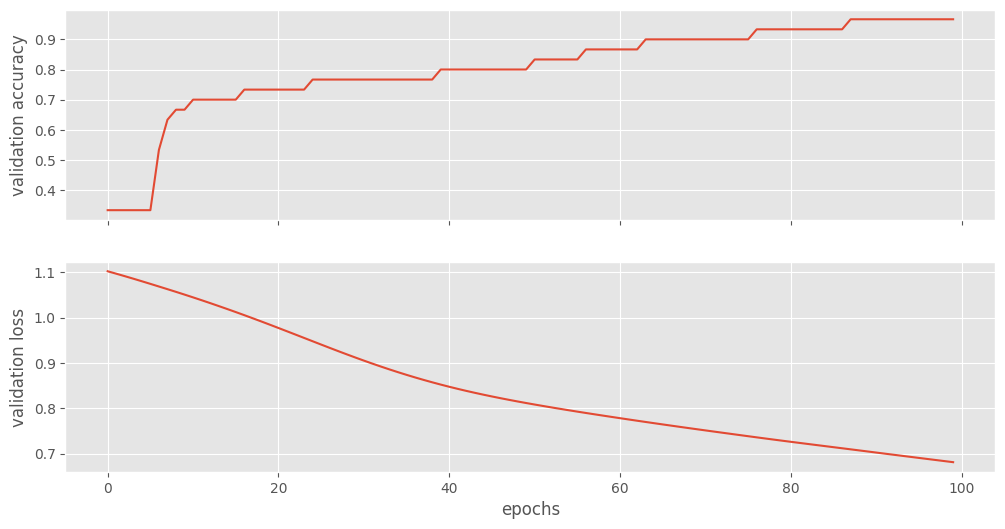

In [160]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

## Show ROC Curve and AUC

We have previously split the data and we can compare now with the Receiver Operating Characteristic ([`ROC`](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)) how well the models perform. The ROC plot compares the false positive rate with the true positive rate. We additionally compute for each model the Area under the curve ([`AUC`](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve)), where auc = 1 is perfect classification and auc = 0.5 is random guessing (for a two class problem). 

To prepare the test data, we need to use the [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) to encode the integer features into a [One-hot](https://en.wikipedia.org/wiki/One-hot) vector which we then flatten with [`numpy.ravel()`](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html) for [`sklearn.metrics.roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html).

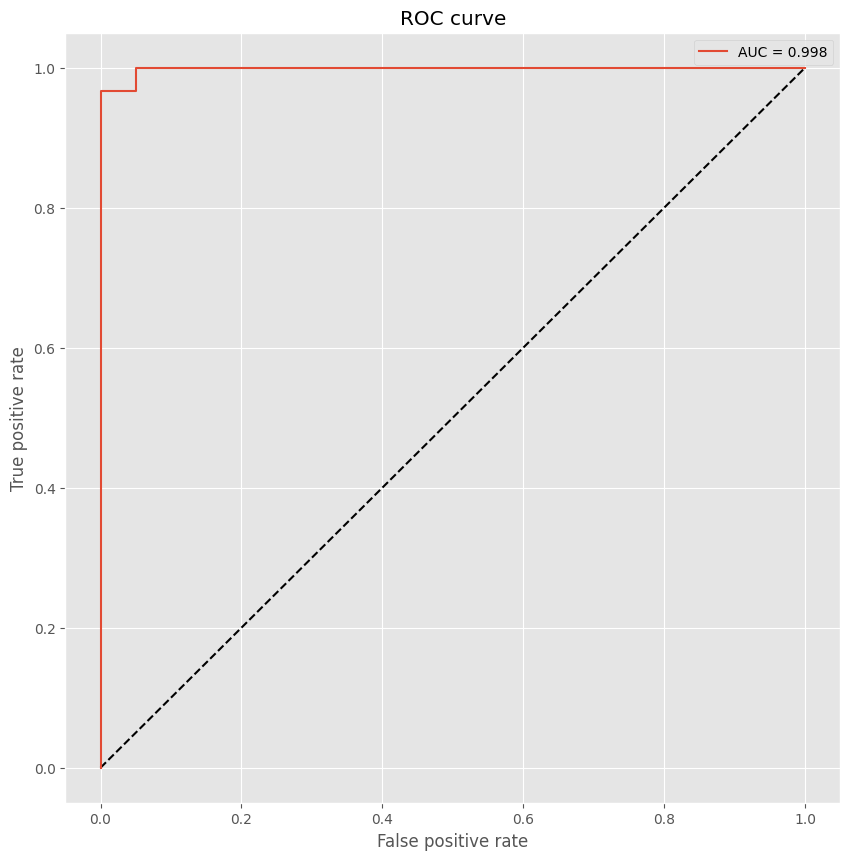

In [161]:
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

# One hot encoding
enc = OneHotEncoder()
Y_onehot = enc.fit_transform(y_test[:, np.newaxis]).toarray()

with torch.no_grad():
    y_pred = model(X_test).numpy()
    fpr, tpr, threshold = roc_curve(Y_onehot.ravel(), y_pred.ravel())
    
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();